In [1]:
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib.lines import Line2D
import matplotlib.ticker as plticker

In [7]:
wd = "../../"
bench_results = f"{wd}/benchmarks/data/output/load/report.tsv"

tool_pretty_names = {
    "cooler_cool": "cooler",
    "hictk_cool": "hictk (cooler)",
    "hictk_hic": "hictk (hic)",
    "hictools_hic": "hictools",
}

resolutions_pretty = {
    10: "10",
    100: "100",
    500: "500",
    1000: "1k",
    5000: "5k",
    10000: "10k",
    25000: "25k",
    50000: "50k",
    100000: "100k",
    250000: "250k",
    500000: "500k",
    1000000: "1M",
    2500000: "2.5M",
    5000000: "5M",
}

color_palette = ["cornflowerblue", "forestgreen", "orange", "blueviolet"]


matplotlib.rcParams.update(
    {"axes.titlesize": 10, "axes.labelsize": 22, "legend.fontsize": 17, "xtick.labelsize": 18, "ytick.labelsize": 18}
)

In [8]:
def import_data(path) -> pd.DataFrame:
    df = pd.read_table(path)
    df["time_min"] = df["time"] / 60  # sec -> min
    df["memory_gb"] = df["memory"] / 1.0e6  # kb -> gb
    df["tool"] = (df["tool"] + "_" + df["format"]).map(tool_pretty_names)
    df["resolution_pretty"] = df["resolution"].map(resolutions_pretty)

    return df.sort_values(["resolution", "tool"])

In [22]:
df = import_data(bench_results)
df = df[df["cpus"] == 1]
df

,tool,format,resolution,cpus,time,memory,size,time_min,memory_gb,resolution_pretty
4,cooler,cool,10,1,37932.17,758648760,17182191751,632.202833,758.648760,10
58,cooler,cool,10,1,35753.27,758618160,17182191751,595.887833,758.618160,10
112,cooler,cool,10,1,36102.95,758636996,17182191751,601.715833,758.636996,10
13,hictk (cooler),cool,10,1,10600.60,12831880,17497429866,176.676667,12.831880,10
67,hictk (cooler),cool,10,1,10915.45,12831708,17497429866,181.924167,12.831708,10
...,...,...,...,...,...,...,...,...,...,...
72,hictk (hic),hic,100000,1,3335.12,4514068,349683229,55.585333,4.514068,100k
126,hictk (hic),hic,100000,1,3480.55,4512848,349683229,58.009167,4.512848,100k
36,hictools,hic,100000,1,21398.96,3532876,630851844,356.649333,3.532876,100k
90,hictools,hic,100000,1,21190.10,3493796,630851844,353.168333,3.493796,100k


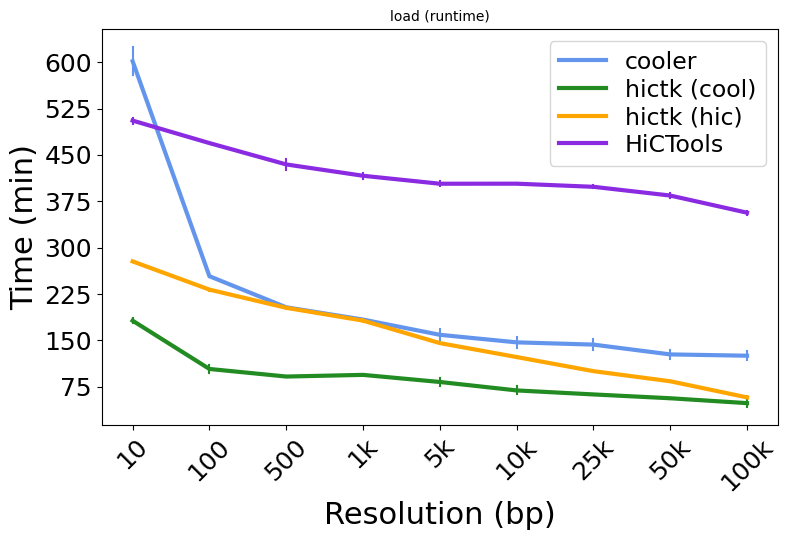

In [23]:
fig, ax1 = plt.subplots(1, 1, figsize=(8, 5.5))

sns.lineplot(
    df,
    x="resolution_pretty",
    y="time_min",
    hue="tool",
    palette=color_palette,
    estimator="median",
    err_style="bars",
    errorbar=("se", 2),
    ax=ax1,
    linewidth=3,
    seed=123456,
    legend=True,
)

ax1.set(title="load (runtime)", ylabel="Time (min)", xlabel="Resolution (bp)")

ax1.tick_params(axis="x", rotation=45)

ax1.legend(
    handles=[
        Line2D([0], [0], color=color_palette[0], lw=3, label="cooler"),
        Line2D([0], [0], color=color_palette[1], lw=3, label="hictk (cool)"),
        Line2D([0], [0], color=color_palette[2], lw=3, label="hictk (hic)"),
        Line2D([0], [0], color=color_palette[3], lw=3, label="HiCTools"),
    ],
    labelspacing=0.2,
    loc="upper right",
)

loc1 = plticker.MultipleLocator(base=75)
ax1.yaxis.set_major_locator(loc1)

fig.tight_layout()
fig.savefig("/tmp/load_runtime.png", dpi=600)
fig.savefig("/tmp/load_runtime.svg")

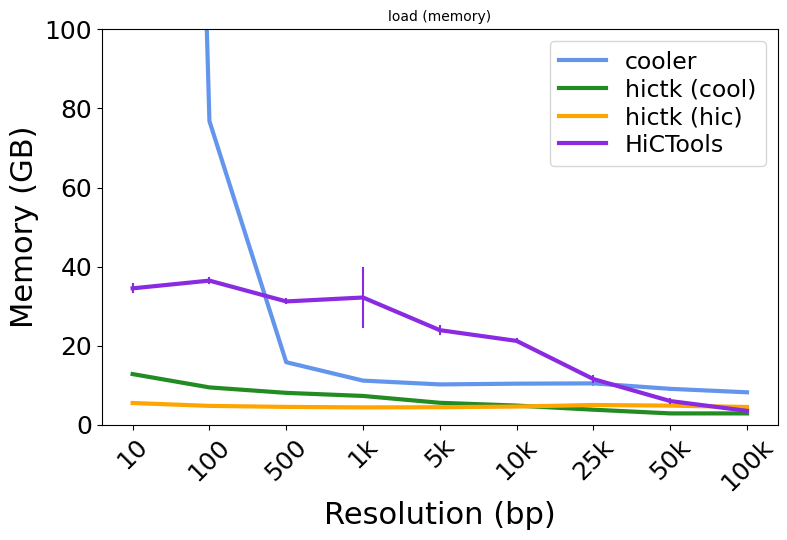

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5.5))


sns.lineplot(
    df,
    x="resolution_pretty",
    y="memory_gb",
    hue="tool",
    palette=color_palette,
    estimator="median",
    err_style="bars",
    errorbar=("se", 2),
    ax=ax,
    linewidth=3,
    seed=123456,
    legend=False,
)

ax.set(title="load (memory)", ylabel="Memory (GB)", xlabel="Resolution (bp)")

ax.tick_params(axis="x", rotation=45)

ax.set_ylim(0, 100)

ax.legend(
    handles=[
        Line2D([0], [0], color=color_palette[0], lw=3, label="cooler"),
        Line2D([0], [0], color=color_palette[1], lw=3, label="hictk (cool)"),
        Line2D([0], [0], color=color_palette[2], lw=3, label="hictk (hic)"),
        Line2D([0], [0], color=color_palette[3], lw=3, label="HiCTools"),
    ],
    labelspacing=0.2,
)

loc = plticker.MultipleLocator(base=20)

ax.yaxis.set_major_locator(loc)

fig.tight_layout()
fig.savefig("/tmp/load_memory.png", dpi=600)
fig.savefig("/tmp/load_memory.svg")

In [25]:
df[df["tool"] == "hictk (cooler)"]

,tool,format,resolution,cpus,time,memory,size,time_min,memory_gb,resolution_pretty
13,hictk (cooler),cool,10,1,10600.60,12831880,17497429866,176.676667,12.831880,10
67,hictk (cooler),cool,10,1,10915.45,12831708,17497429866,181.924167,12.831708,10
121,hictk (cooler),cool,10,1,10959.39,12830016,17497429866,182.656500,12.830016,10
12,hictk (cooler),cool,100,1,6787.64,9461244,11617202471,113.127333,9.461244,100
66,hictk (cooler),cool,100,1,6138.97,9461244,11617202471,102.316167,9.461244,100
120,hictk (cooler),cool,100,1,6227.51,9461044,11617202471,103.791833,9.461044,100
17,hictk (cooler),cool,500,1,5505.05,8080172,8165191895,91.750833,8.080172,500
71,hictk (cooler),cool,500,1,5491.98,8080072,8165191895,91.533000,8.080072,500
125,hictk (cooler),cool,500,1,5487.70,8080248,8165191895,91.461667,8.080248,500
11,hictk (cooler),cool,1000,1,5652.86,7303456,6812137818,94.214333,7.303456,1k


In [26]:
df[df["tool"] == "hictk (hic)"]

,tool,format,resolution,cpus,time,memory,size,time_min,memory_gb,resolution_pretty
26,hictk (hic),hic,10,1,16734.02,5516120,23939446932,278.900333,5.516120,10
80,hictk (hic),hic,10,1,16669.02,5516280,23939446932,277.817000,5.516280,10
134,hictk (hic),hic,10,1,16670.56,5519472,23939446932,277.842667,5.519472,10
24,hictk (hic),hic,100,1,14064.20,4789200,17224560675,234.403333,4.789200,100
78,hictk (hic),hic,100,1,13930.36,4788948,17224560675,232.172667,4.788948,100
132,hictk (hic),hic,100,1,13918.51,4787412,17224560675,231.975167,4.787412,100
34,hictk (hic),hic,500,1,12249.16,4532008,12340329392,204.152667,4.532008,500
88,hictk (hic),hic,500,1,12164.15,4532124,12340329392,202.735833,4.532124,500
142,hictk (hic),hic,500,1,12129.14,4530660,12340329392,202.152333,4.530660,500
22,hictk (hic),hic,1000,1,10874.81,4406572,9931139577,181.246833,4.406572,1k


In [27]:
cooler_runtime = df[df["tool"] == "cooler"]["time"].reset_index()
hictk_cool_runtime = df[df["tool"] == "hictk (cooler)"]["time"].reset_index()
hictk_hic_runtime = df[df["tool"] == "hictk (hic)"]["time"].reset_index()
hictools_runtime = df[df["tool"] == "hictools"]["time"].reset_index()

In [33]:
cooler_vs_hictk_min = (cooler_runtime / hictk_cool_runtime)["time"].min()
cooler_vs_hictk_max = (cooler_runtime / hictk_cool_runtime)["time"].max()

hictools_vs_hictk_min = (hictools_runtime / hictk_hic_runtime)["time"].min()
hictools_vs_hictk_max = (hictools_runtime / hictk_hic_runtime)["time"].max()

In [34]:
print(cooler_vs_hictk_min, "-", cooler_vs_hictk_max)
print(hictools_vs_hictk_min, "-", hictools_vs_hictk_max)

1.8927499979892386 - 3.5783040582608527
1.81869235346623 - 6.353624457290892
